In [1]:
import vaex as vx
import pylab as plt
import numpy as np
%matplotlib inline

In [2]:
ds = vx.example()

In [ ]:
size = 20
shape_vector = 32
limits = [-size, size]

We now select a region in energy ($E$) and angular momentum ($L_z$) that corresponds to a satellite that is not fully phase mixed

/Users/users/breddels/src/vaex/vaex/dataset.py:2381: RuntimeWarning: divide by zero encountered in log
  fgrid.__setitem__(item, f(grid.__getitem__(item)))
/Users/users/breddels/src/vaex/vaex/image.py:96: RuntimeWarning: invalid value encountered in true_divide
  result = ((1.-aB) * aA * xA  + (1.-aA) * aB * xB + aA * aB * f) / aR
/Users/users/breddels/src/vaex/vaex/image.py:99: RuntimeWarning: invalid value encountered in true_divide
  result = (np.minimum(aA, 1-aB)*xA + aB*xB)/aR


9595.0


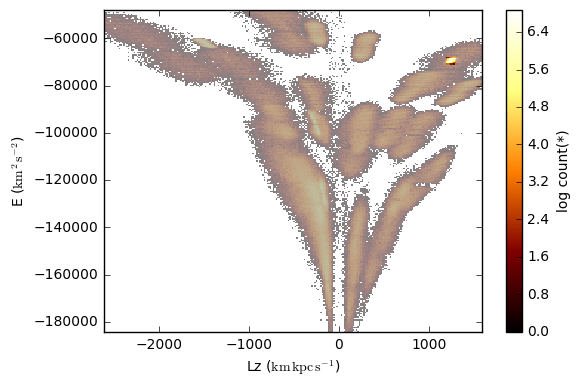

In [46]:
limits_Lz_E_clump = (1181.77098138, 1291.92208245), (-70850.9198711, -68491.169297)
ds.select_rectangle("Lz", "E", limits_Lz_E_clump, name="stream")
ds.plot("Lz", "E", selection=[None, "stream"], f="log")
print(ds.count(selection="stream"))

/Users/users/breddels/src/vaex/vaex/dataset.py:990: RuntimeWarning: invalid value encountered in true_divide
  mean = stats[...,1] / counts


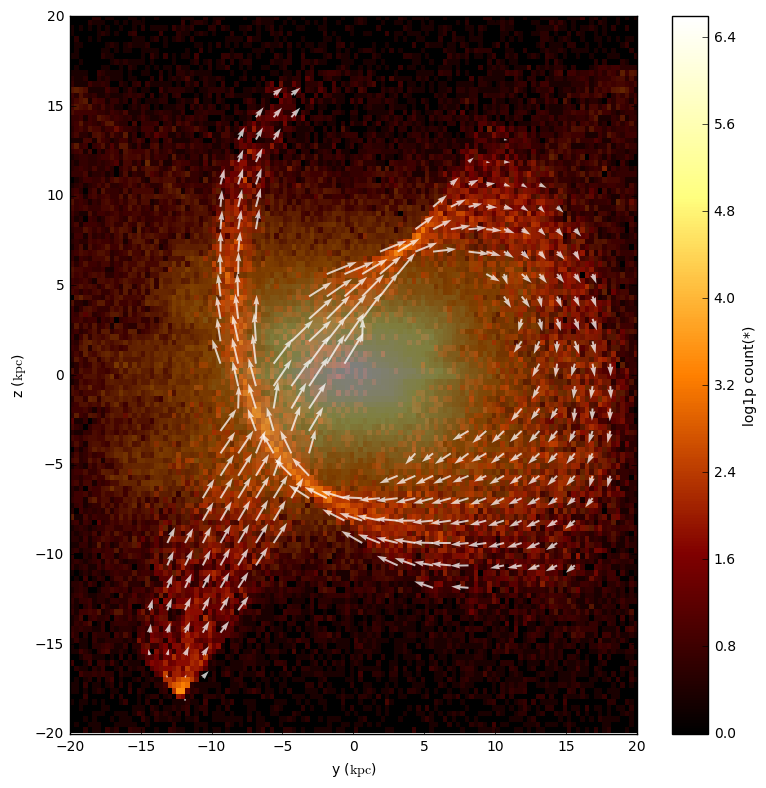

In [48]:
# calculate the mean vy on a course grid
mean_vy = ds.mean("vy", binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')
mean_vz = ds.mean("vz", binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')

# create a 2d array with holds the center of the bins
centers = np.linspace(*limits, shape_vector, endpoint=False) + (limits[1] - limits[0])/2./shape_vector
z, y = np.meshgrid(centers, centers)

# we don't want to show bins with low number of counts
counts = ds.count(binby=["y", "z"], limits=limits, shape=shape_vector, selection='stream')
mask = counts.flatten( ) > 10

# background density
ds.plot("y", "z", limits=limits, f="log1p", figsize=(8,8), selection=[None, "stream"], shape=128)

# overplot the mean vectors
plt.quiver(y.flatten()[mask], z.flatten()[mask], mean_vy.flatten()[mask], mean_vz.flatten()[mask],
         color="white", alpha=0.75)